# Biblioteca

In [1]:
import pandas as pd
import sklearn
import numpy as np
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
sns.set_palette("husl")

# Dados

In [3]:
dados_treino = pd.read_csv("porto_seguro_limpo_treino.csv")
dados_teste = pd.read_csv("porto_seguro_limpo_teste.csv")

In [4]:
X_treino = dados_treino.drop(["id", "target"], 1)
y_treino = dados_treino.loc[:, ["target"]]

X_teste = dados_teste.drop(["id", "target"], 1)
y_teste = dados_teste.loc[:, ["target"]]

# Previsão

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parametros_tunados = [{'max_depth': [3, 7, 10],
                       'max_features' : [5, 10],
#                      'learning_rate': [0.1, 0.5],
                     'n_estimators': [50, 100]}]

model = GridSearchCV(XGBClassifier(), parametros_tunados, cv=3, scoring='roc_auc')

# Resultados

In [10]:
# result = model.fit(X_treino, y_treino)

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_teste, result.predict_proba(X_teste)[:, 1])

print("Parâmetros escolhidos:")
print()
print(model.best_params_)
print()
print("Grid scores:")
print()
media = model.cv_results_['mean_test_score']
desv_pad = model.cv_results_['std_test_score']
for media, desv_pad, params in zip(media, desv_pad, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (media, desv_pad * 2, params))
print()
print("AUC: %.4f" % auc)

Parâmetros escolhidos:

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Grid scores:

0.629 (+/-0.002) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.636 (+/-0.002) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.630 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
0.629 (+/-0.007) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
0.620 (+/-0.004) for {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
0.613 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
0.631 (+/-0.007) for {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}
0.626 (+/-0.007) for {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
0.588 (+/-0.003) for {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 50}
0.573 (+/-0.008) for {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 100}
0.559 (+/-0.005) for {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}
0.551 (+/-0.0

In [11]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, max_depth=3, max_features=5)

In [12]:
from sklearn.metrics import roc_auc_score

result = xgb.fit(X_treino, y_treino)

auc = roc_auc_score(y_teste, result.predict_proba(X_teste)[:, 1])
print("AUC: %.4f" % auc)

AUC: 0.6377


Text(0.5,0,'Importância relativa')

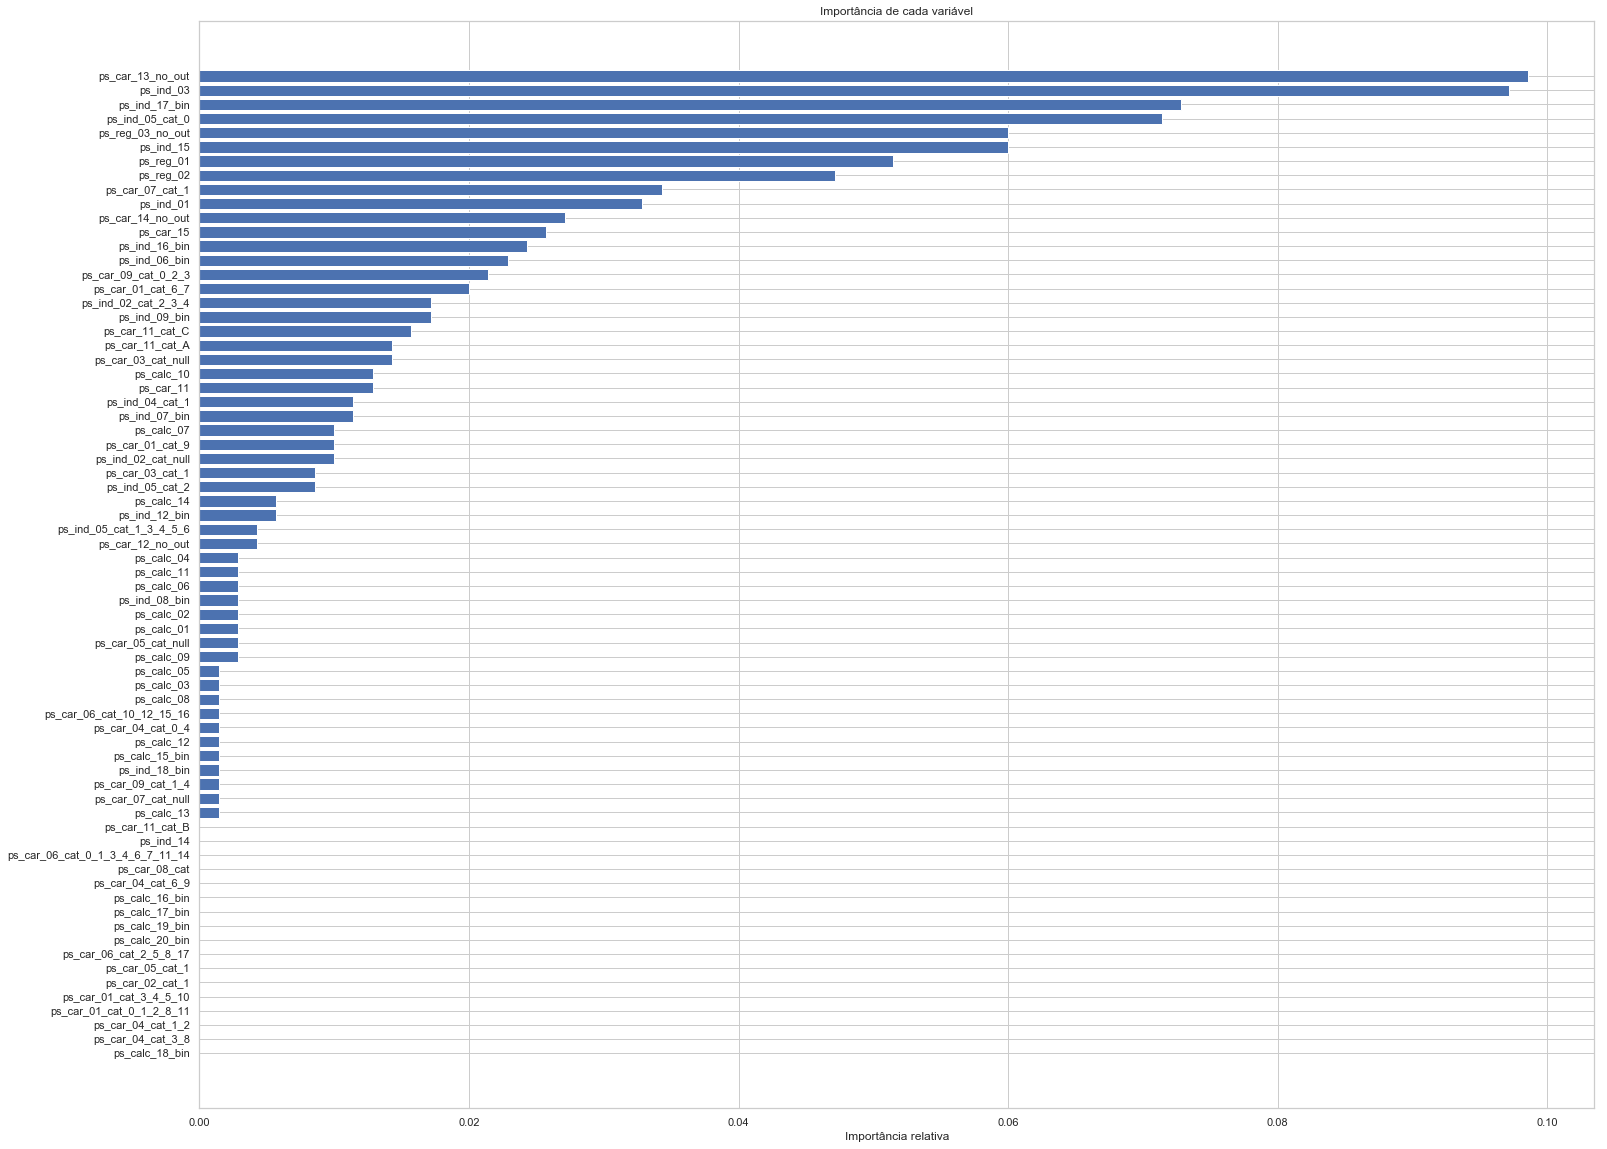

In [13]:
sns.set(rc={'figure.figsize':(25,20)})
sns.set_style("whitegrid")
sns.set_palette("husl")


importances = xgb.feature_importances_
indices = np.argsort(importances)
features = X_treino.columns

plt.figure(1)
plt.title('Importância de cada variável')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância relativa')

# Tree 1

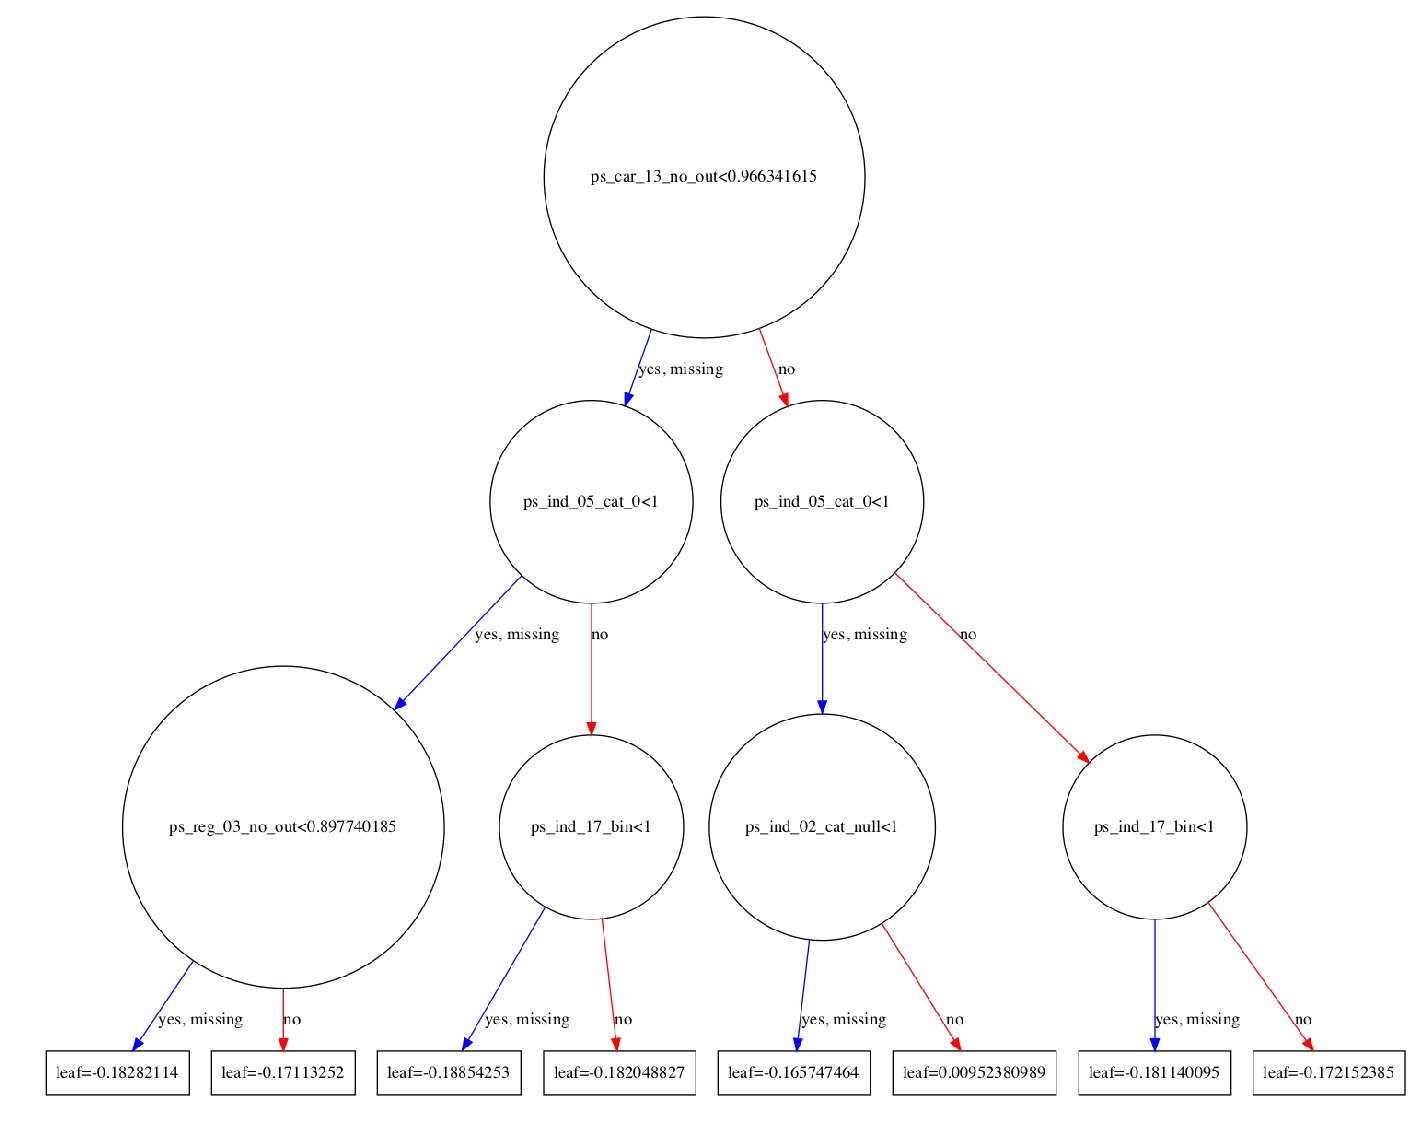

In [27]:
from xgboost import plot_tree

plot_tree(xgb, num_trees=0)
plt.show()

# Tree 2

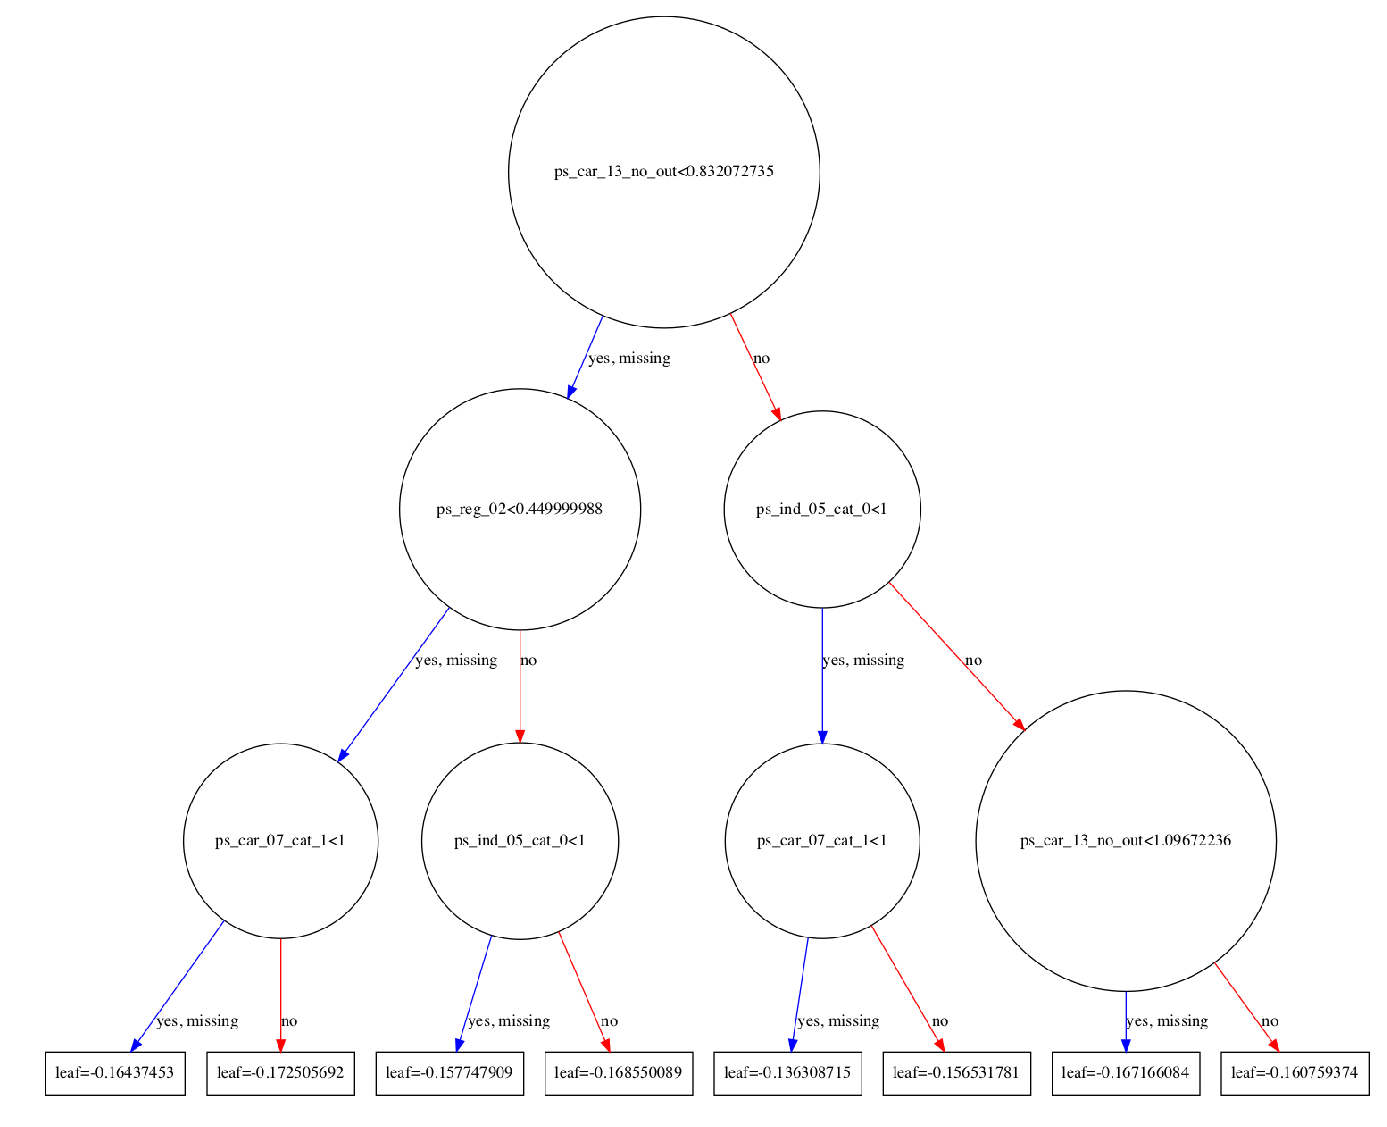

In [26]:
plot_tree(xgb, num_trees=1)
plt.show()

# Tree 3

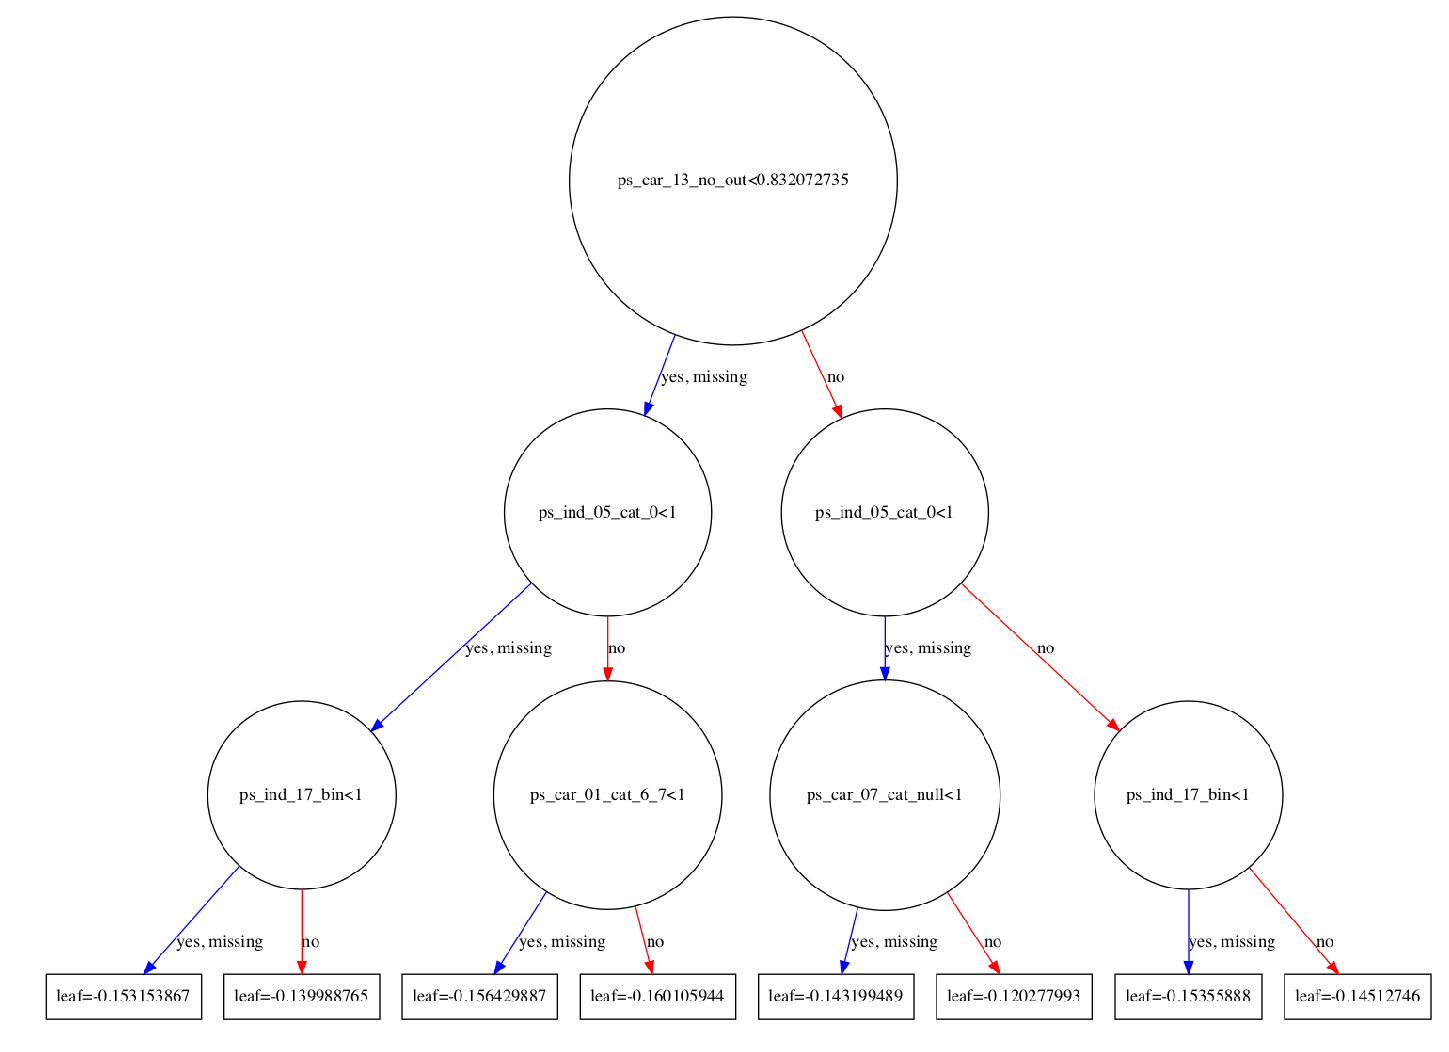

In [28]:
plot_tree(xgb, num_trees=2)
plt.show()

# Comentários

Como otimizar os parâmetros

Devo utilizar log loss ???